In [1]:
# Assignment on Microsoft Data
# Problem Statement - Identify whether a machine has been affected by Virus or not
# Output variable - HasDetections (value is 0 or 1, categorical variable) 
# Built few classification models and measure the performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Import Microsoft Dataset
ms_df = pd.read_csv('Microsoft_Data-1.csv')

#ms_df.dtypes

In [3]:
# Selecting features/columns from data file
# If any of the columns have unique values or having null values more than 50 % then drop those columns
# Drop unique value columns - MachineIdentifier
# Drop same value across column - IsBeta
# Drop columns with null value > 50 % - DefaultBrowsersIdentifier, AVProductStatesIdentifier, AVProductsInstalled,
#   AVProductsEnabled, CountryIdentifier, CityIdentifier, OrganizationIdentifier, GeoNameIdentifier, LocaleEnglishNameIdentifier
#   AutoSampleOptIn, PuaMode, Census_IsFlightingInternal, Census_IsFlightingInternal, Census_ThresholdOptIn

#List columns with null value > 50 %
missing_values=pd.DataFrame({'Column Name':ms_df.columns,'Missing Values Count':ms_df.isnull().sum(),
                            'Missing values percentage':ms_df.isnull().sum()/ms_df.shape[0]*100})
missing_values.sort_values(by='Missing values percentage',ascending=False)
cols_to_drop=list(missing_values[missing_values['Missing values percentage']>50].index)

# List unique value columns
for col in ms_df.columns:
    if ms_df[col].nunique()==ms_df.shape[0] or ms_df[col].nunique()==1:
        cols_to_drop.append(col)       

# Drop the columns from dataframe        
ms_df.drop(columns=cols_to_drop,inplace=True)

#cols_to_drop
#ms_df.columns

In [4]:
# Train Test Split
# Separating Out put variable 

y = ms_df['HasDetections']
ms_df.drop(columns='HasDetections',inplace=True)  #dropping output variable from the dataset. Seting the inplace parameter to True so that drop happens immediately

# Splitting the data in to 80 : 20 ratio for traning and test purpose, "random" is used to freeze the data
x_train,x_test,y_train,y_test=train_test_split(ms_df,y,test_size=0.20,random_state=31)  # to not change the random model 

#y.value_counts()

In [5]:
# Convert all the columns to Object type
for col in x_train.columns:
    x_train[col]=x_train[col].astype('object')
    x_test[col]=x_test[col].astype('object')
    
cols_to_fill_df=pd.DataFrame(x_train.isnull().sum())
cols_to_fill=list(cols_to_fill_df[cols_to_fill_df[0]!=0].index)
#cols_to_fill_df


In [5]:
#x_train.isnull().sum()
#x_train['RtpStateBitfield']
#x_test.isnull().sum()
#x_train.dtypes

In [7]:
# Filling the Missing values with Mode
for col in cols_to_fill:
    x_train[col]=x_train[col].fillna(x_train[col].mode()[0]).astype('object')
    x_test[col]=x_test[col].fillna(x_test[col].mode()[0]).astype('object')

"""x_train.isnull().sum()
x_test.isnull().sum()
x_train.dtypes"""

'x_train.isnull().sum()\nx_test.isnull().sum()\nx_train.dtypes'

In [7]:
#x_train['RtpStateBitfield']
#x_train.isnull().sum()
#x_test.isnull().sum()
#x_train.dtypes

In [9]:
# Missing Value Treatment
# One Hot Encoding
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le_ext=LabelEncoderExt()

for col in x_train.columns:
    le_ext.fit(x_train[col].astype(str))
    x_train[col]=le_ext.transform(x_train[col].astype(str))
    
    x_test[col]=le_ext.transform(x_test[col])


In [9]:
#x_train['Processor']
#x_train.isnull().sum()
#x_test.isnull().sum()
#x_train.dtypes

In [10]:
#Instantiating the model, Log_reg is the object
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, roc_auc_score, roc_curve, f1_score

log_reg = LogisticRegression()

# Training the model on the train data
log_reg.fit(x_train,y_train)

# Predict on the test data
y_pred=log_reg.predict(x_test)

#y_pred

print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Accuracy 0.4921599718111346
Precision 0.0
Recall 0.0
F1 score: 0.0


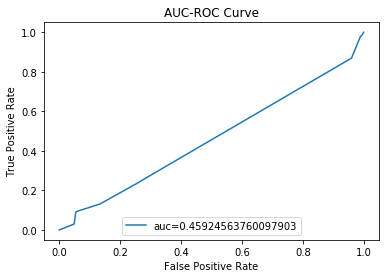

Accuracy 0.4857293868921776
Precision 0.4872866597004528
Recall 0.24267129228100606
F1 score: 0.3239925891616489


In [13]:
# Build Decision Tree Classifier Model and check the performnace
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, roc_auc_score, roc_curve, f1_score

decision_tree = DecisionTreeClassifier(max_depth= 8, min_samples_leaf=3, min_samples_split=5)
decision_tree.fit(x_train,y_train)   # X - input variables data, y - output variable data

y_dt_pred=decision_tree.predict(x_test)

df=pd.DataFrame({'Test':y_test,'Pred':y_dt_pred})

y_pred_proba = decision_tree.predict_proba(x_test)[::,1]  # used for slicing

y_pred_proba

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=8)
plt.show()

print("Accuracy", accuracy_score(y_test,y_dt_pred))
print("Precision", precision_score(y_test, y_dt_pred))
print("Recall", recall_score(y_test, y_dt_pred))
print('F1 score:', f1_score(y_test, y_dt_pred))

In [12]:
# Hyper parameter tuning using GridsearchCV
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()

Param_dict = {'max_depth':[3,4,6,8,9],
              'min_samples_split':[2,3,5,7],
             'min_samples_leaf':[3,6,7,8]}

grid_search = GridSearchCV(decision_tree, param_grid=Param_dict,cv=5)

grid_search.fit(x_train,y_train)

grid_pred=grid_search.predict(x_test)

grid_search.best_estimator_
grid_search.best_params_

#dt1 = DecisionTreeClassifier(random_state=42, max_depth= 8, min_samples_leaf=3, min_samples_split=5)
#dt1.fit(x_train,y_train)
#best_tree_pred=dt1.predict(x_test)
#print(accuracy_score(y_test,grid_pred))
#accuracy_score(y_test,best_tree_pred)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5}

In [14]:
# Hyper parameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

Param_dict = {'max_depth':[3,4,6,8,9],
              'min_samples_split':[2,3,5,7],
             'min_samples_leaf':[3,6,7,8]}

random_search = RandomizedSearchCV(decision_tree, param_distributions=Param_dict,cv=5, n_iter=60)

random_search.fit(x_train,y_train)

random_pred=random_search.predict(x_test)

random_search.best_estimator_
random_search.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 8}

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)